In [47]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [48]:
df = pd.read_csv(r'C:\Users\megha\Downloads\DIABETES DISEASE PREDICTION NEW\DIABETES DISEASE PREDICTION NEW\Diabetes Disease\diabetes_data_upload.csv')
df.head()
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [49]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [51]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [52]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [53]:
df.columns = map(str.lower, df.columns)

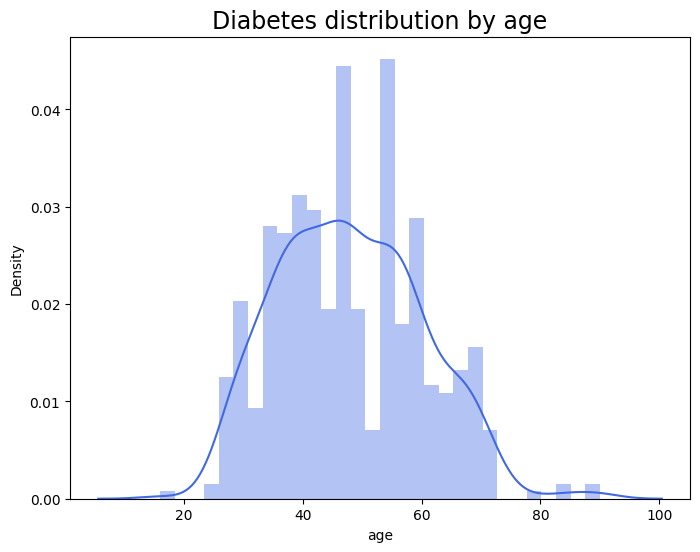

In [54]:
plt.figure(figsize=(8,6))
sns.distplot(df['age'],bins=30, color='royalblue')  
plt.title('Diabetes distribution by age', fontsize=17);

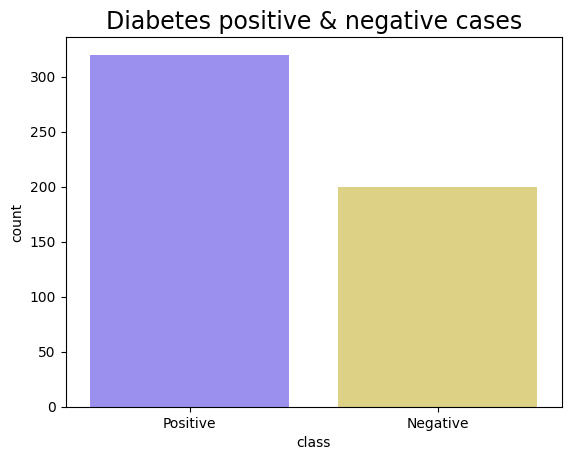

<Figure size 1500x800 with 0 Axes>

In [55]:
sns.countplot(x='class',data=df, palette=['#9080ff',"#ebdc78"])
plt.title('Diabetes positive & negative cases', fontsize=17);
plt.figure(figsize=(15,8))
plt.show()

<Axes: title={'center': 'Diabetes cases by Gender'}, xlabel='gender', ylabel='count'>

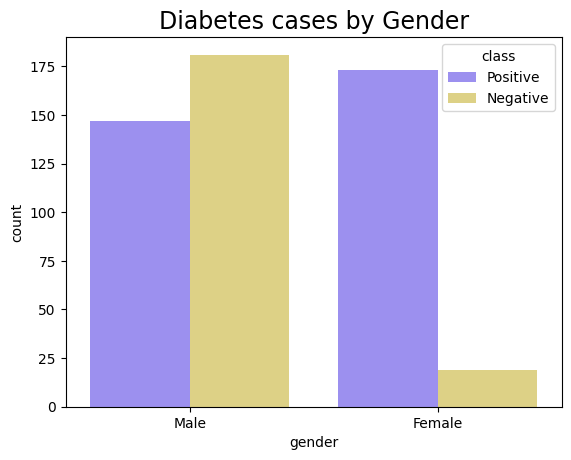

In [56]:
plt.title('Diabetes cases by Gender', fontsize=17);
sns.countplot(x='gender',hue='class', data=df, palette=['#9080ff',"#ebdc78"])

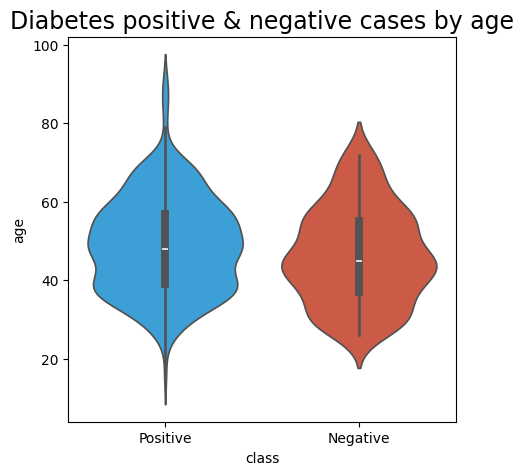

In [57]:
plt.figure(figsize=(5,5))
plt.title('Diabetes positive & negative cases by age', fontsize=17);

ax = sns.violinplot(x="class", y="age", data=df, palette=['#22a7f0',"#e14b31"])
# ax.set_xticklabels({'class':['Negative','Positive']})
# ax.set_xticklabels([*'Positive'])

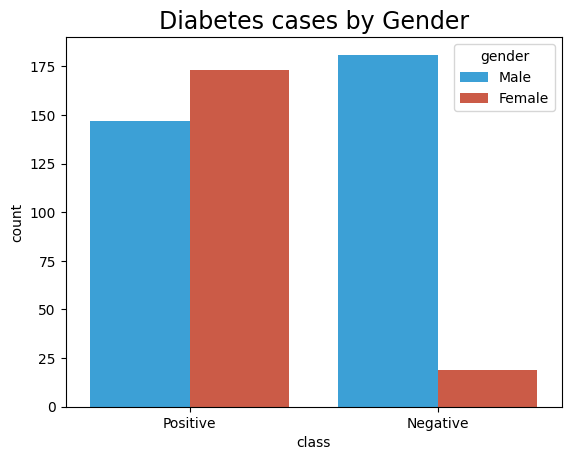

In [58]:
plt.title('Diabetes cases by Gender', fontsize=17);
ax = sns.countplot(x="class", data=df, hue="gender", palette=['#22a7f0',"#e14b31"])


In [59]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})
df['polyuria'] = df['polyuria'].map({'Yes':1,'No':0})
df['polydipsia'] = df['polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['polyphagia'] = df['polyphagia'].map({'Yes':1,'No':0})
df['genital thrush'] = df['genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['itching'] = df['itching'].map({'Yes':1,'No':0})
df['irritability'] = df['irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['alopecia'] = df['alopecia'].map({'Yes':1,'No':0})
df['obesity'] = df['obesity'].map({'Yes':1,'No':0})

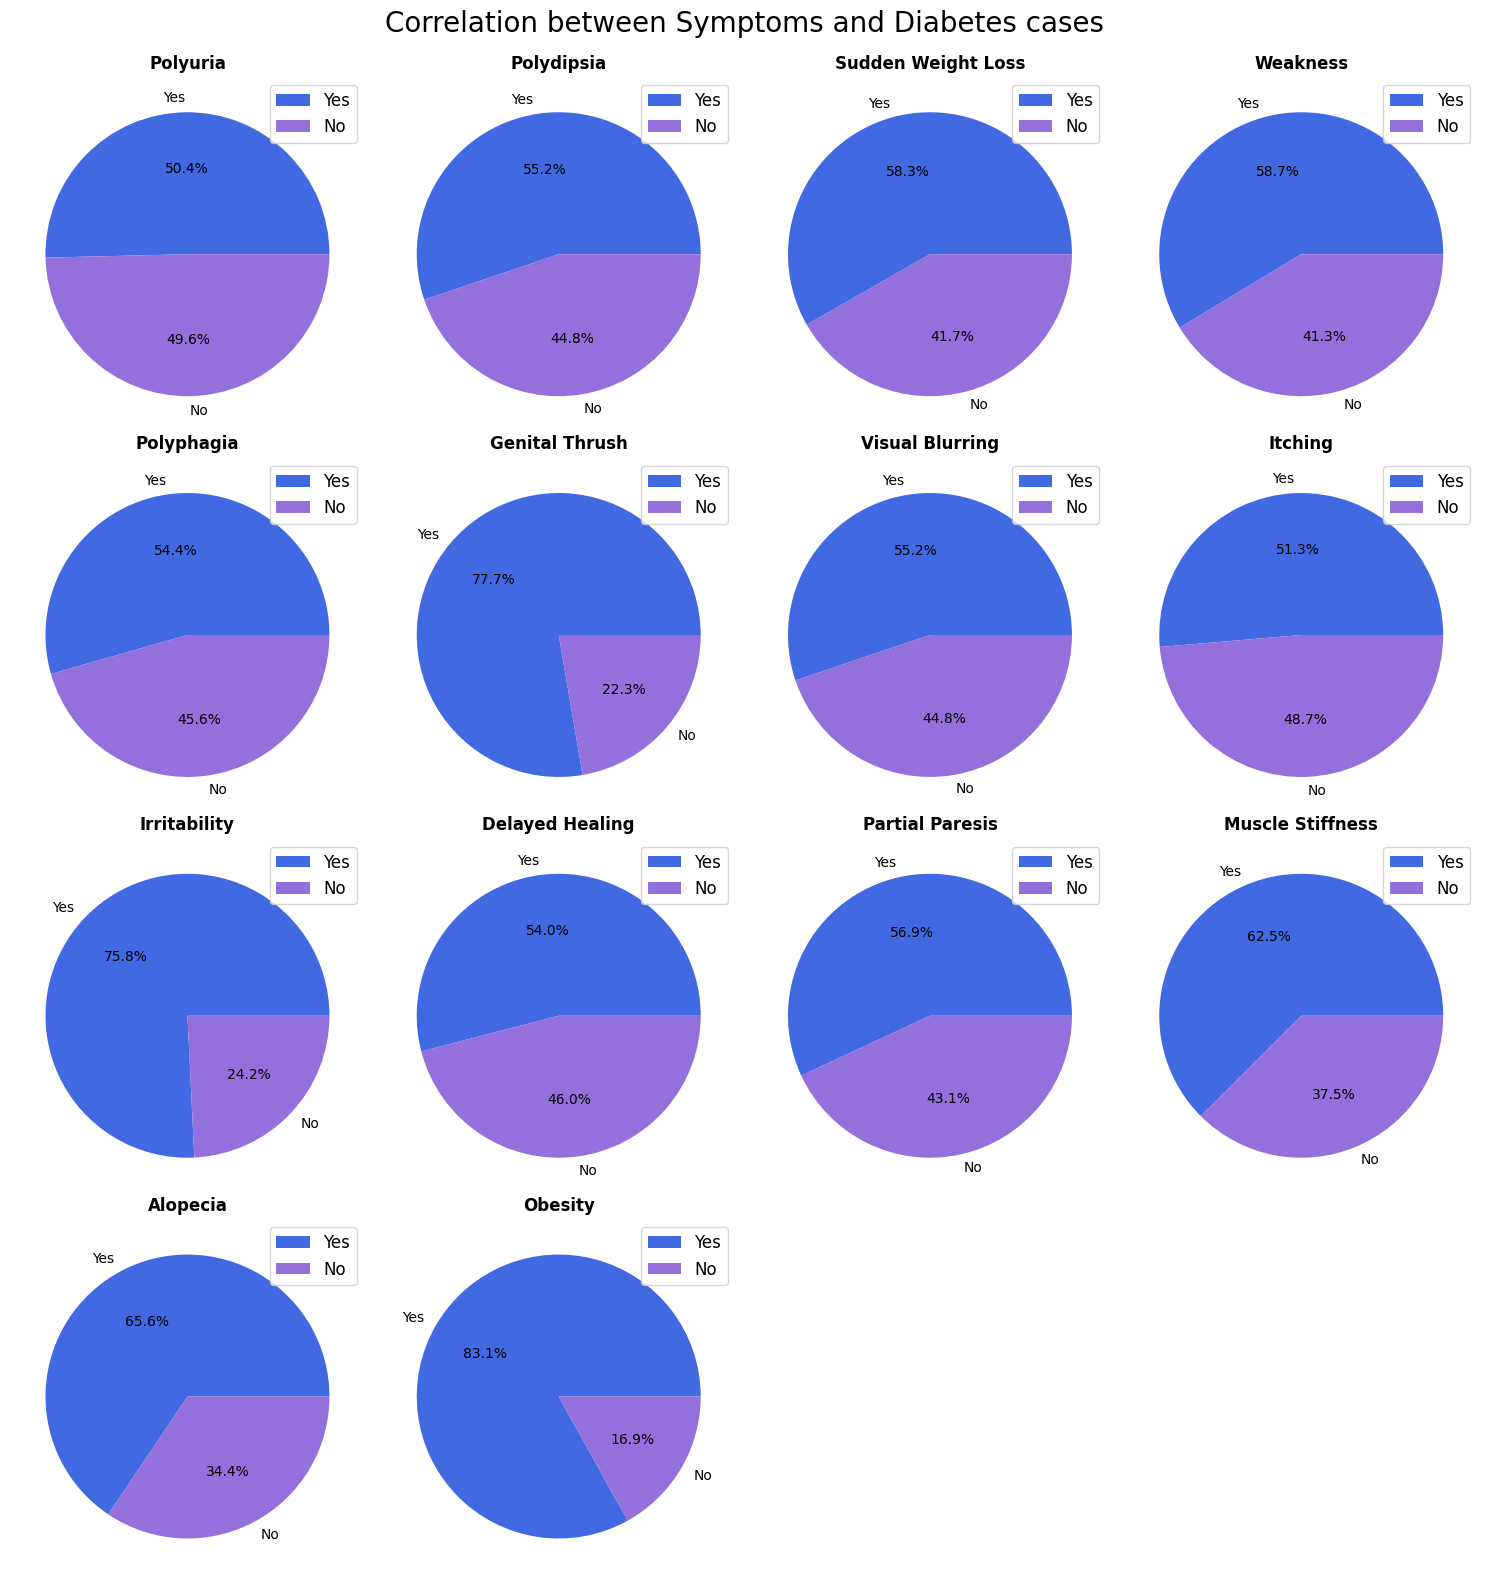

In [60]:
count = 1
plt.figure(figsize=(15,20))
plt.suptitle('Correlation between Symptoms and Diabetes cases'+ '\n', fontsize=20)
for i in df.columns:
    if i not in ['class', 'age', 'gender']:
        plt.subplot(5,4,count)
        plt.title(f'{i.title()}', fontweight='bold', fontsize=14)
        count +=1
        plt.tight_layout()
        df[i].value_counts().plot(kind="pie", colors=['royalblue','mediumpurple'],autopct='%1.1f%%',legend=True,labels=["Yes","No"])
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout() 
plt.show()


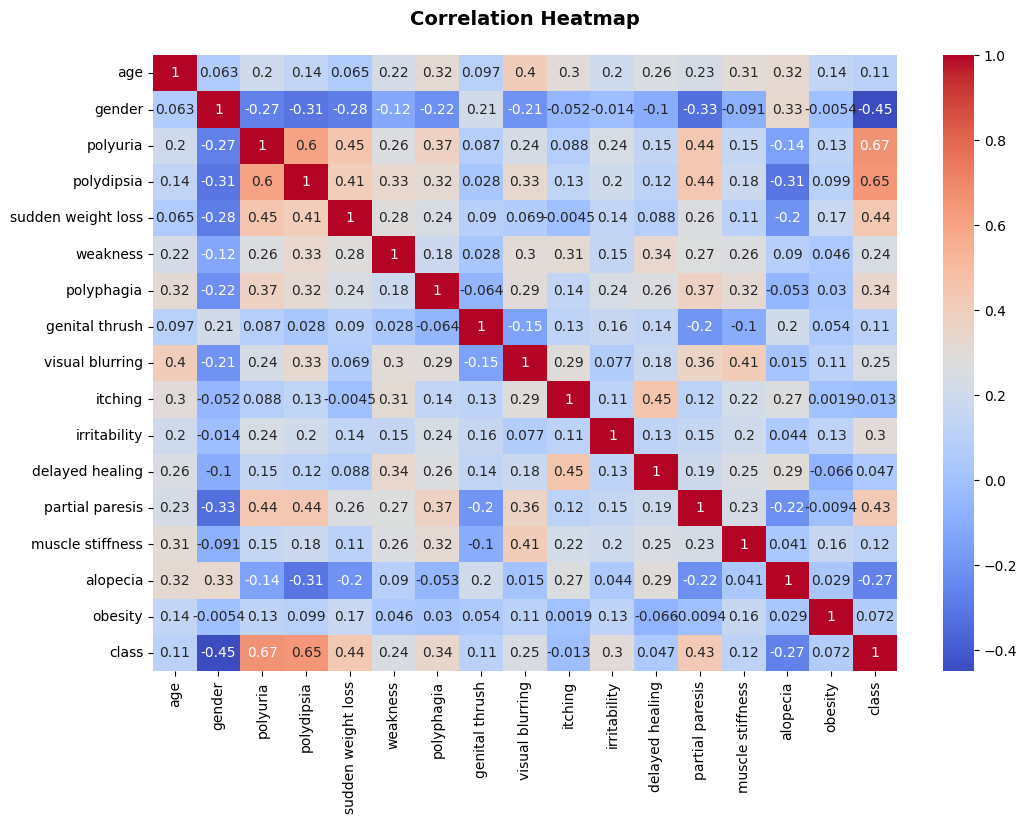

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

# Pre-processing

In [62]:
Y = df['class']
X = df.drop('class', axis=1)


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=1)

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [65]:
X = ss.fit_transform(X)

In [66]:
X_train

array([[-0.65890237,  0.74090227, -0.99452051, ...,  1.33365136,
        -0.74535599,  2.16506351],
       [-0.9130604 ,  0.74090227, -0.99452051, ..., -0.74982115,
         1.34164079, -0.46188022],
       [ 0.01885238,  0.74090227, -0.99452051, ..., -0.74982115,
        -0.74535599, -0.46188022],
       ...,
       [ 1.45908122, -1.34970568, -0.99452051, ..., -0.74982115,
        -0.74535599, -0.46188022],
       [-1.84497318,  0.74090227, -0.99452051, ..., -0.74982115,
        -0.74535599, -0.46188022],
       [ 1.28964254,  0.74090227,  1.00550968, ...,  1.33365136,
         1.34164079,  2.16506351]])

In [67]:
y_train

122    1
168    1
23     1
13     1
61     1
      ..
129    1
144    1
72     1
235    0
37     1
Name: class, Length: 364, dtype: int64

# Model building

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Logistic Regression

In [69]:
lin_model=LogisticRegression()
lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)
linscore = lin_model.score(X_test,y_test)

In [70]:
lin_error = mean_squared_error(y_test, lin_pred)
print("The Mean Squared Error For Linear Regression is: {}".format(lin_error))

The Mean Squared Error For Linear Regression is: 0.07692307692307693


In [71]:
acc=[]

In [72]:
linscore = lin_model.score(X_test,y_test)
acc.append(linscore)
lin_cm = confusion_matrix(y_test,lin_pred)
lin_cr = classification_report(y_test,lin_pred)
print('Logistic Regression results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(linscore *100))
print('\n')
print('Confusion Matrix')
print(lin_cm)
print('\n')
print('Classification report')
print(lin_cr)                    

Logistic Regression results
---------------------------
Accuracy is 92.31%


Confusion Matrix
[[52  6]
 [ 6 92]]


Classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.94      0.94      0.94        98

    accuracy                           0.92       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.92      0.92      0.92       156



# Linear SVM

In [73]:
svm_model=SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

In [74]:
svm_error = mean_squared_error(y_test, svm_pred)
print("The Mean Squared Error For Support Vector Machine is: {}".format(svm_error))

The Mean Squared Error For Support Vector Machine is: 0.08333333333333333


In [75]:
svmscore= svm_model.score(X_test, y_test)
acc.append(svmscore)
svm_cm = confusion_matrix(y_test,svm_pred)
svm_cr = classification_report(y_test,svm_pred)
print('Support Vector Machine results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(svmscore *100))
print('\n')
print('Confusion Matrix')
print(svm_cm)
print('\n')
print('Classification report')
print(svm_cr) 

Support Vector Machine results
---------------------------
Accuracy is 91.67%


Confusion Matrix
[[53  5]
 [ 8 90]]


Classification report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        58
           1       0.95      0.92      0.93        98

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156



# K-Nearest Neighbour

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with different values for n_estimators
param_grid = {'n_estimators': [10, 50, 100, 150, 200]}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=0)

# Use GridSearchCV for cross-validated hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best number of estimators
best_n_estimators = grid_search.best_params_['n_estimators']

# Train the model with the best number of estimators
best_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=0)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [77]:
from sklearn.model_selection import cross_val_score

# Define a range of k values
k_values = list(range(1, 21))

# Perform cross-validation for each k value
cv_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]

print(f'The optimal number of neighbors is {optimal_k} with an accuracy of {max(cv_scores):.2f}')

The optimal number of neighbors is 1 with an accuracy of 0.97


In [78]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [79]:
knn_error = mean_squared_error(y_test, knn_pred)
print("The Mean Squared Error For K Nearest Neighbour is: {}".format(knn_error))

The Mean Squared Error For K Nearest Neighbour is: 0.05128205128205128


In [80]:
knnscore = knn_model.score(X_test,y_test)
acc.append(knnscore)
knn_cm = confusion_matrix(y_test,knn_pred)
knn_cr = classification_report(y_test,knn_pred)
print('K Nearest Neighbour results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(knnscore *100))
print('\n')
print('Confusion Matrix')
print(knn_cm)
print('\n')
print('Classification report')
print(knn_cr) 

K Nearest Neighbour results
---------------------------
Accuracy is 94.87%


Confusion Matrix
[[57  1]
 [ 7 91]]


Classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.99      0.93      0.96        98

    accuracy                           0.95       156
   macro avg       0.94      0.96      0.95       156
weighted avg       0.95      0.95      0.95       156



# Random Forest

In [81]:
rf_model = RandomForestClassifier(n_estimators=50, random_state = 0)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

In [82]:
import pickle
pickle.dump(rf_model,open('model.pkl','wb'))

In [83]:
print(rf_pred)

[0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 1 1 0 0 0 1 1]


In [84]:
arr = [40,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0]
temp = np.asarray(arr).reshape(1,-1)
predictions = rf_model.predict(temp)
print(predictions)

[1]


In [85]:
rf_error = mean_squared_error(y_test, rf_pred)
print("The Mean Squared Error For Random Forest is: {}".format(rf_error))

The Mean Squared Error For Random Forest is: 0.019230769230769232


In [86]:
rfscore = rf_model.score(X_test,y_test)
acc.append(rfscore)
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cr = classification_report(y_test,rf_pred)
print('Random Forest results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(rfscore *100))
print('\n')
print('Confusion Matrix')
print(rf_cm)
print('\n')
print('Classification report')
print(rf_cr) 

Random Forest results
---------------------------
Accuracy is 98.08%


Confusion Matrix
[[55  3]
 [ 0 98]]


Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.97      1.00      0.98        98

    accuracy                           0.98       156
   macro avg       0.99      0.97      0.98       156
weighted avg       0.98      0.98      0.98       156



In [87]:
idx=0
for i in acc:
    acc[idx]=i*100
    idx=idx+1
acc

[92.3076923076923, 91.66666666666666, 94.87179487179486, 98.07692307692307]

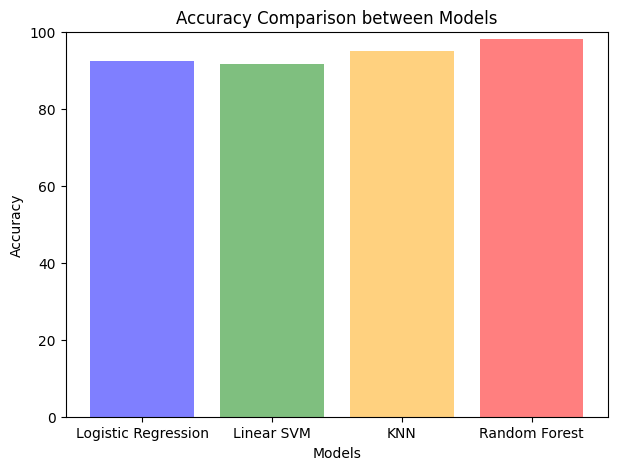

In [88]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['blue', 'green', 'orange', 'red']
# Bar graph
models = ['Logistic Regression','Linear SVM','KNN','Random Forest']
x_pos = np.arange(len(models))

plt.figure(figsize=(7, 5))
plt.bar(x_pos, acc, color=colors, alpha=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Models')
plt.xticks(x_pos, models)
plt.ylim(0, 100)  # Set the y-axis range between 0 and 1 for percentage representation
plt.show()


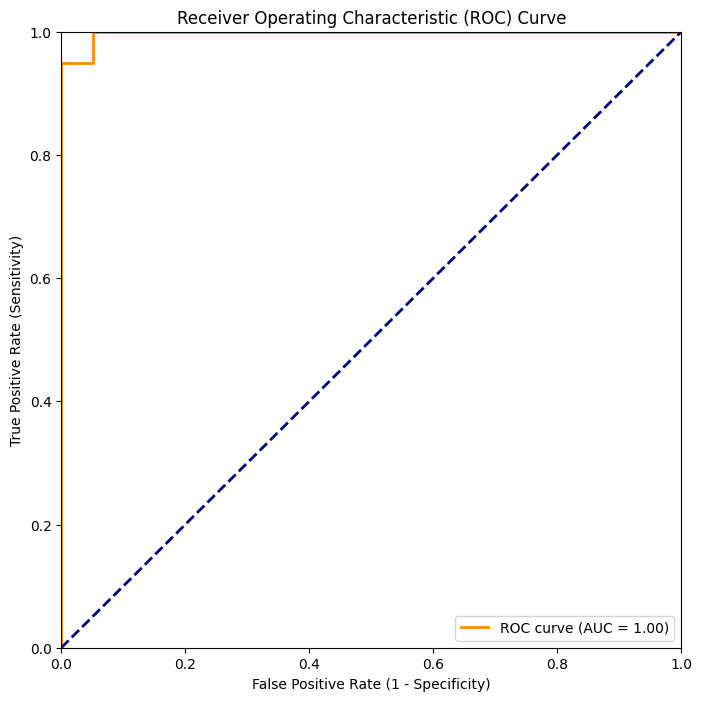

In [89]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
